#  Regularized Linear Regression

### Loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
# Use loadmat to load matlab files
mat=loadmat("data\ex5data1.mat")

# mat is a dict with key "X" for x-values, and key "y" for y values
X=mat["X"]
y=mat["y"]
Xtest=mat["Xtest"]
ytest=mat["ytest"]
Xval=mat["Xval"]
yval=mat["yval"]

In [3]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

### Plot the data

Text(0, 0.5, 'Water flowing out of the dam')

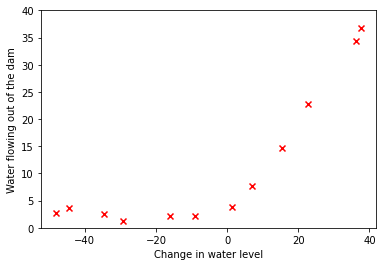

In [4]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylim(0,40)
plt.ylabel("Water flowing out of the dam")

### Compute the Regularized Linear Regression Cost Function

$J(\Theta) = \frac{1}{2m} (\sum_{i=1}^m(h_\Theta(x^{(i)}) - y^{(i)})^2) + \frac{\lambda}{2m}(\sum_{j=1}^n \Theta_j^2)$



In [5]:
def linearRegCostFunction(X, y,theta, Lambda):
    """
    computes the cost of using theta as the parameter for linear regression to fit the data points in X and y. 
    
    Returns the cost and the gradient
    """
    m = len(y)
    
    predictions = X @ theta
    cost = 1/(2*m) * np.sum((predictions - y)**2)
    reg_cost = cost + Lambda/(2*m) * (np.sum(theta[1:]**2))
    
    # compute the gradient
    
    grad1 = 1/m * X.T @ (predictions - y) # @ python native dot product 
    grad2 = 1/m * X.T @ (predictions - y) + (Lambda/m * theta)
    grad = np.vstack((grad1[0],grad2[1:]))
    
    return reg_cost, grad

In [6]:
m = X.shape[0]
theta = np.ones((2,1))
X_1 = np.hstack((np.ones((m,1)),X))
cost, grad = linearRegCostFunction(X_1, y, theta, 1)
print("Cost at theta = [1 ; 1]:",cost)
print("Gradient at theta = [1 ; 1]:",grad)

Cost at theta = [1 ; 1]: 303.9931922202643
Gradient at theta = [1 ; 1]: [[-15.30301567]
 [598.25074417]]


In [7]:
X_test_1 = np.hstack((np.ones((len(Xtest),1)),Xtest))

### Fitting Linear Regression

In [8]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = linearRegCostFunction(X,y,theta,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [9]:
Lambda = 0
theta, J_history = gradientDescent(X_1,y,np.zeros((2,1)),0.001,4000,Lambda)

### Plotting of Cost Function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

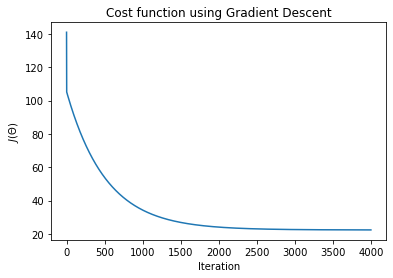

In [10]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

(-50.0, 40.0)

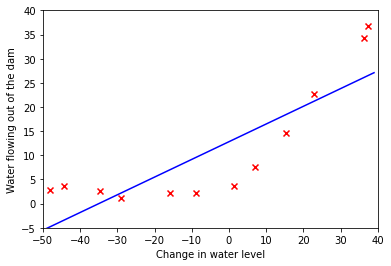

In [11]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=[x for x in range(-50,40)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="b")
plt.ylim(-5,40)
plt.xlim(-50,40)

### Learning curves

In [12]:
def learningCurve(X, y, Xval, yval, Lambda):
    """
    Returns the train and cross validation set errors for a learning curve
    """
    m=len(y)
    n=X.shape[1]
    err_train, err_val = [],[]
    
    for i in range(1,m+1):
        theta = gradientDescent(X[0:i,:],y[0:i,:],np.zeros((n,1)),0.001,3000,Lambda)[0]
        err_train.append(linearRegCostFunction(X[0:i,:], y[0:i,:], theta, Lambda)[0])
        err_val.append(linearRegCostFunction(Xval, yval, theta, Lambda)[0])
        
    return err_train, err_val

In [13]:
Xval_1 = np.hstack((np.ones((21,1)),Xval))
error_train, error_val = learningCurve(X_1, y, Xval_1, yval, Lambda)

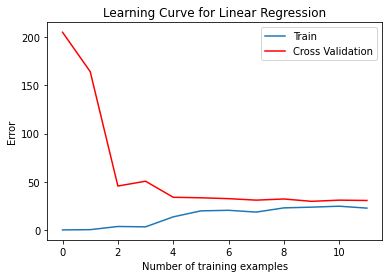

In [14]:
plt.plot(range(12),error_train,label="Train")
plt.plot(range(12),error_val,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()

In [15]:
print("# Training Examples\t Train Error \t\t Cross Validation Error")
for i in range(1,13):
    print("\t",i,"\t\t",error_train[i-1],"\t",error_val[i-1],"\n")

# Training Examples	 Train Error 		 Cross Validation Error
	 1 		 9.860761315262648e-32 	 205.1210957454735 

	 2 		 0.26667458269926014 	 164.2535605474932 

	 3 		 3.548185635907084 	 45.54817576824285 

	 4 		 3.1874889363749985 	 50.52763121765736 

	 5 		 13.54362450791914 	 33.8818916785026 

	 6 		 19.77082269208633 	 33.33501763960231 

	 7 		 20.35490053770414 	 32.44949025865311 

	 8 		 18.491367932249474 	 30.897434817077908 

	 9 		 22.864926631607066 	 32.092911163044654 

	 10 		 23.624561039168142 	 29.654014029816686 

	 11 		 24.604608486625352 	 30.890073919404443 

	 12 		 22.620437267861497 	 30.554053720180832 



### Test Error

In [16]:
linearRegCostFunction(X_test_1, ytest, theta, Lambda)[0]

33.11615456618272

### Polynomial Regression

In [17]:
def polyFeatures(X, p):
    """
    Takes a data matrix X (size m x 1) and maps each example into its polynomial features where 
    X_poly(i, :) = [X(i) X(i).^2 X(i).^3 ...  X(i).^p];
    """
    for i in range(2,p+1):
        X = np.hstack((X,(X[:,0]**i)[:,np.newaxis]))
    
    return X

In [18]:
# Map X onto Polynomial features and normalize
p=8
X_poly = polyFeatures(X, p)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_poly=sc_X.fit_transform(X_poly)
X_poly = np.hstack((np.ones((X_poly.shape[0],1)),X_poly))

In [19]:
# Map Xtest onto polynomial features and normalize
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = sc_X.transform(X_poly_test)
X_poly_test = np.hstack((np.ones((X_poly_test.shape[0],1)),X_poly_test))

In [20]:
# Map Xval onto polynomial features and normalize
X_poly_val = polyFeatures(Xval, p)
X_poly_val = sc_X.transform(X_poly_val)
X_poly_val = np.hstack((np.ones((X_poly_val.shape[0],1)),X_poly_val))

### Learning Polynomial Regression

In [21]:
theta_poly, J_history_poly = gradientDescent(X_poly,y,np.zeros((9,1)),0.3,20000,Lambda) 

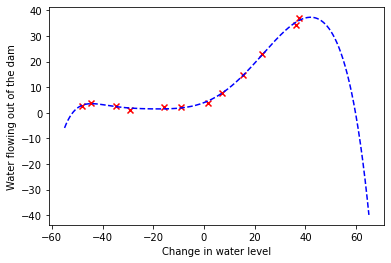

In [22]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=np.linspace(-55,65,2400)

# Map the X values and normalize
x_value_poly = polyFeatures(x_value[:,np.newaxis], p)
x_value_poly = sc_X.transform(x_value_poly)
x_value_poly = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_value= x_value_poly @ theta_poly
plt.plot(x_value,y_value,"--",color="b")

In [23]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, Lambda)

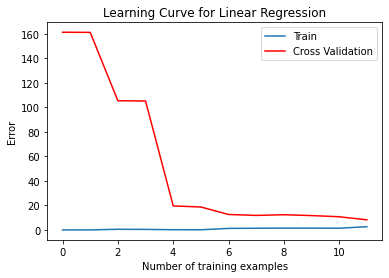

In [24]:
plt.plot(range(12),error_train,label="Train")
plt.plot(range(12),error_val,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()

### Test Error

In [25]:
linearRegCostFunction(X_poly_test, ytest, theta_poly, Lambda)[0]

18.134720016463955

### Polynomial regression with lambda = 8

In [30]:
Lambda = 0.8
theta_poly, J_history_poly = gradientDescent(X_poly,y,np.zeros((9,1)),0.01,20000,Lambda) 

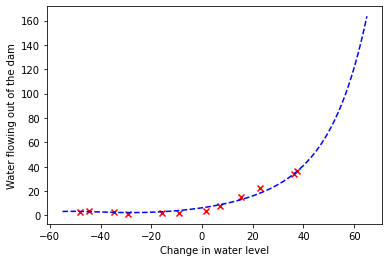

In [31]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=np.linspace(-55,65,2400)

# Map the X values and normalize
x_value_poly = polyFeatures(x_value[:,np.newaxis], p)
x_value_poly = sc_X.transform(x_value_poly)
x_value_poly = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_value= x_value_poly @ theta_poly
plt.plot(x_value,y_value,"--",color="b")

In [32]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, Lambda)

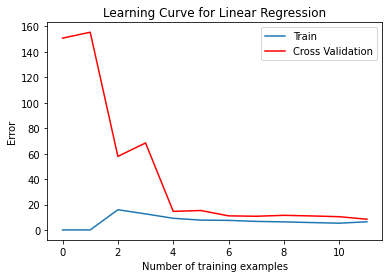

In [33]:
plt.plot(range(12),error_train,label="Train")
plt.plot(range(12),error_val,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()

In [34]:
len(X_poly_test), len(ytest)

(21, 21)

### Test Error

In [35]:
linearRegCostFunction(X_poly_test, ytest, theta_poly, Lambda)[0]

5.355646053414318